# Replication Of McDonalds Case Study | Feynn Labs

## Step 1: Importing The Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import seaborn as sns
import warnings

In [100]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from statsmodels.graphics.mosaicplot import mosaic
warnings.filterwarnings("ignore")

## Step 2: Data Collection

In [101]:
#READ THE DATASET
df = pd.read_csv('C:\\Users\\KIIT\\Downloads\\mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## Step 3: Exploring Data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [103]:
df_taste = df.iloc[:,:-4]
df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [104]:
for feature in df_taste.columns:
    df_taste[feature] = np.where(df_taste[feature] == 'Yes',1,0)
    df[feature] = np.where(df[feature] == 'Yes',1,0)
    
df_taste.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [105]:
df_taste.mean().round(4)

yummy         0.5526
convenient    0.9078
spicy         0.0936
fattening     0.8672
greasy        0.5265
fast          0.9002
cheap         0.5988
tasty         0.6442
expensive     0.3579
healthy       0.1989
disgusting    0.2429
dtype: float64

## Step 4: Principal Components Analysis 

In [106]:
pcoma = PCA(n_components=11).fit(np.array(df_taste))
transformed_df = pcoma.transform(df_taste)
df_PCA = pd.DataFrame(transformed_df, columns=df_taste.columns)
df_PCA

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [107]:
sd_arr = df_PCA.describe().loc['std']
temp_frame = pd.DataFrame({'std':sd_arr})
sd = temp_frame['std']
temp_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
temp_frame['Cumulative_Proportion'] = np.cumsum(temp_frame['variance'])
temp_frame.head()

,std,variance,Cumulative_Proportion
yummy,0.757050,0.299447,0.299447
convenient,0.607456,0.192797,0.492244
spicy,0.504619,0.133045,0.625290
fattening,0.398799,0.083096,0.708386
greasy,0.337405,0.059481,0.767866


In [108]:
pcoma_df = pd.DataFrame(pcoma.components_.round(3),columns=df_taste.columns)
pcoma_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,-0.477,-0.155,-0.006,0.116,0.304,-0.108,-0.337,-0.472,0.329,-0.214,0.375
1,0.364,0.016,0.019,-0.034,-0.064,-0.087,-0.611,0.307,0.601,0.077,-0.140
2,-0.304,-0.063,-0.037,-0.322,-0.802,-0.065,-0.149,-0.287,0.024,0.192,-0.089
3,0.055,-0.142,0.198,-0.354,0.254,-0.097,0.119,-0.003,0.068,0.763,0.370
4,-0.308,0.278,0.071,-0.073,0.361,0.108,-0.129,-0.211,-0.003,0.288,-0.729


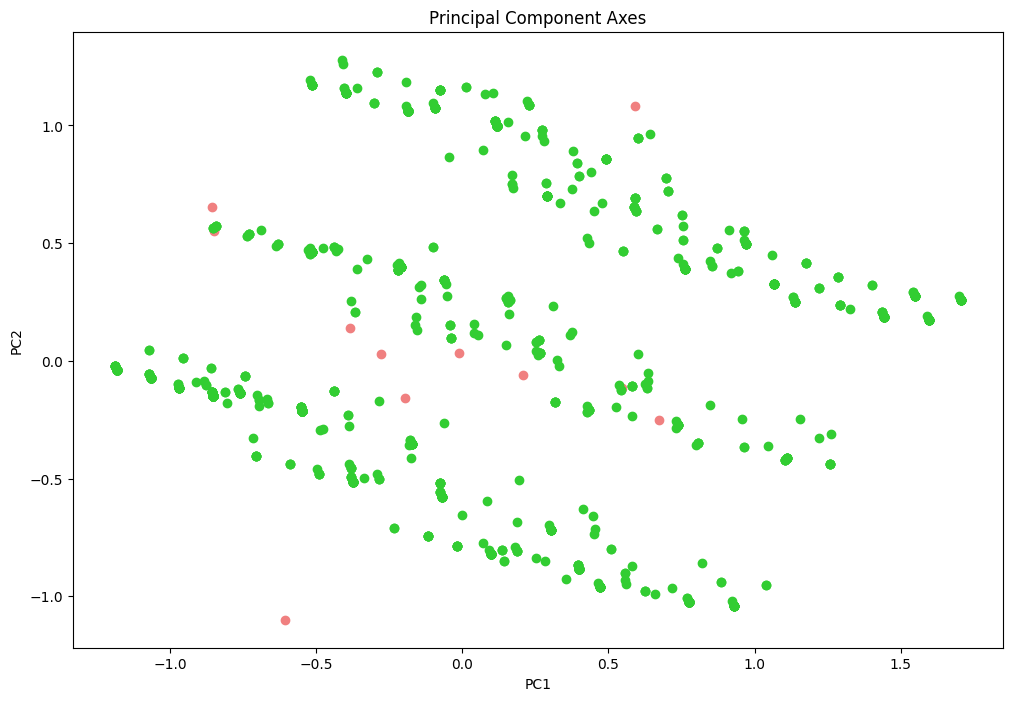

In [110]:
scale = 1.8
plt.figure(figsize=(12,8))
for i,j in enumerate(df_PC.index):
    plt.text(pcoma.components_[0, :][i]*scale, (pcoma.components_[1, :][i])*scale, j, color='red')
    plt.annotate('', xytext=(0, 0), xy=(pcoma.components_[0, :][i]*scale, pcoma.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='lightcoral'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale, color='lightcoral')
plt.scatter(data=df_PCA, x='yummy', y='convenient',color='limegreen');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')

plt.show()

## Step 5: Extracting The Segments From Dataset

### (A). Using K-Means Clustering

Text(0, 0.5, 'SUM OF WITHIN CLUSTER DISTANCES')

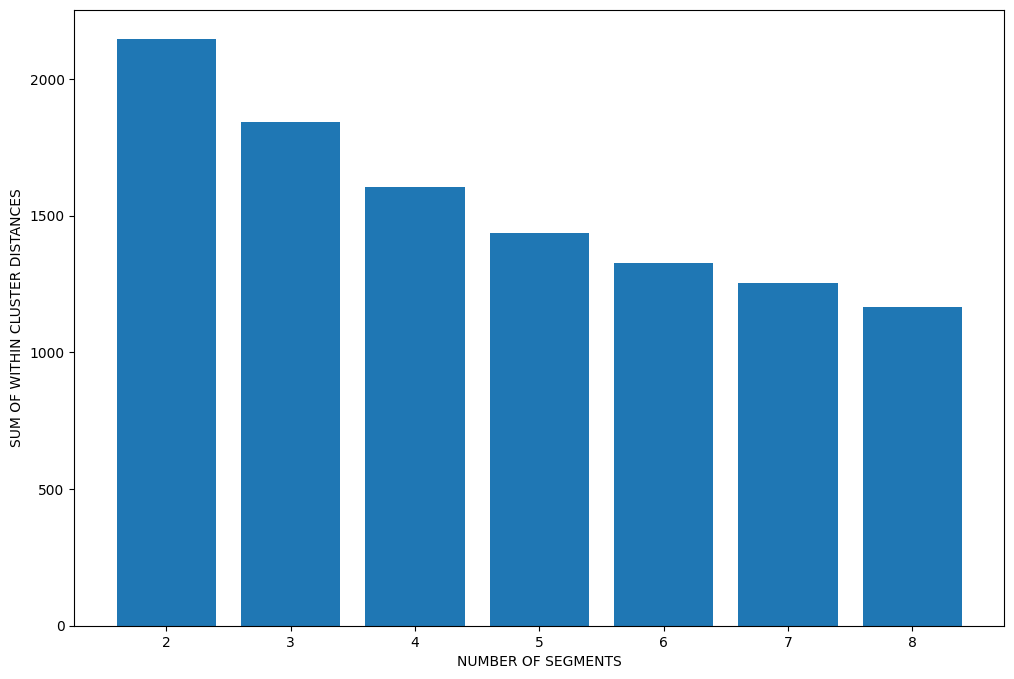

In [111]:
k_range = range(2, 9)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(df_taste)
    labels = model.predict(df_taste)
    inertias.append(model.inertia_)
    k_result.append(labels)
    
plt.figure(figsize=(12,8))
plt.bar(range(2, 9), inertias)
plt.xlabel('NUMBER OF SEGMENTS')
plt.ylabel('SUM OF WITHIN CLUSTER DISTANCES')

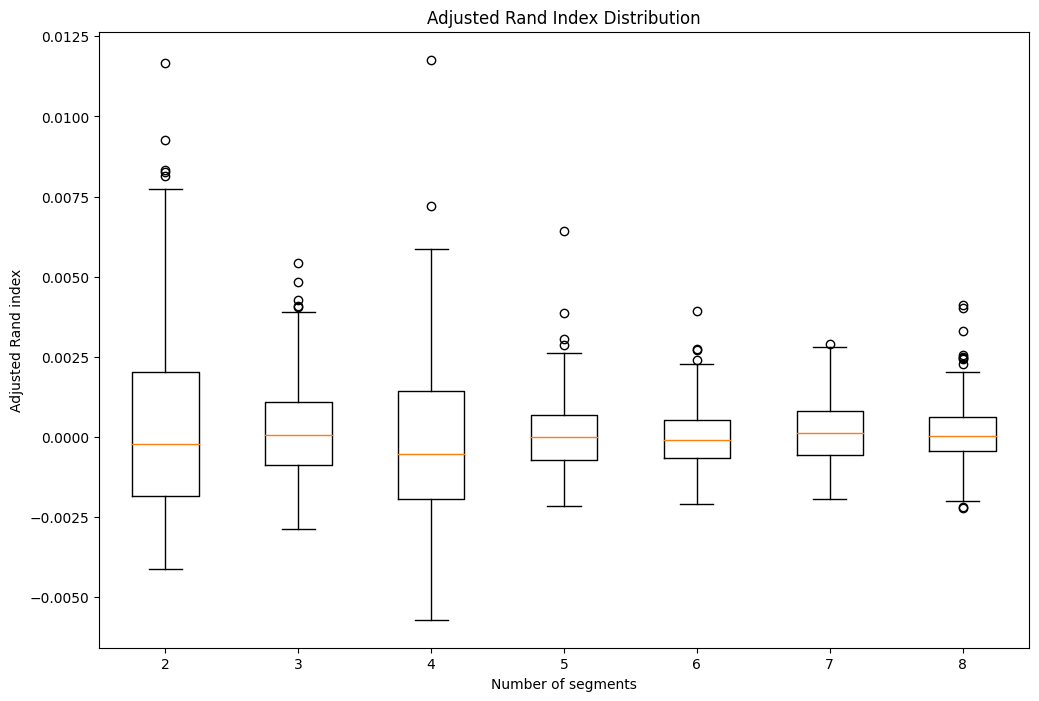

In [112]:
n_boot = 100*2
plt.figure(figsize = (12,8))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)
plt.boxplot(ari_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [113]:
#CREATING SEGMENTS
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_taste)
label4 = model.predict(df_taste)

### (B). Using Mixture Of Distribution

In [114]:
score,aic,bic = [],[],[]

models = []
for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10)
    model.fit(df_taste)
    models.append(model)
    score.append(model.score(df_taste))
    aic.append(model.aic(df_taste))
    bic.append(model.bic(df_taste))

table = pd.DataFrame({
    'k': k_range,
    'LogLik': score,
    'AIC': aic,
    'BIC': bic
})


table

,k,LogLik,AIC,BIC
0,2,7.672279,-21985.641850,-21167.027072
1,3,10.417700,-29807.835653,-28577.272793
2,4,14.001785,-40067.187707,-38424.676765
3,5,14.463234,-41252.157927,-39197.698904
4,6,20.356053,-58220.691209,-55754.284104
5,7,17.071014,-48518.366055,-45640.010869
6,8,18.935284,-53779.933858,-50489.630590


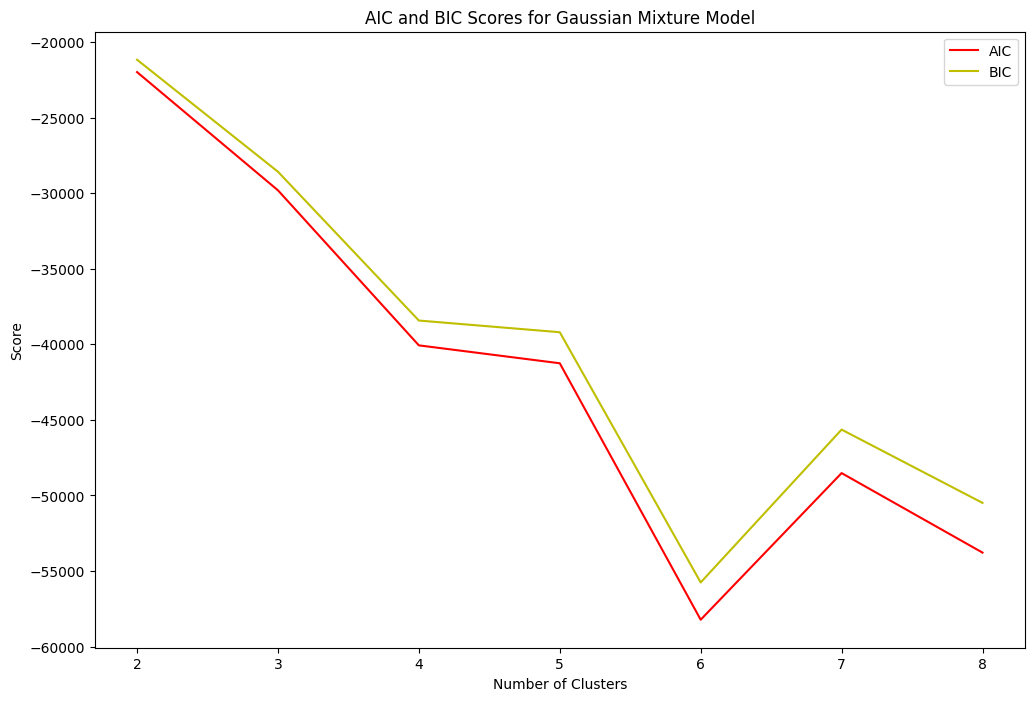

In [116]:
plt.figure(figsize=(12, 8))
plt.plot(k_range, aic, label='AIC',color='r')
plt.plot(k_range, bic, label='BIC',color='y')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

In [117]:
g_mixture = GaussianMixture(n_components=4, n_init=10, random_state=0)
g_mixture.fit(df_taste)

cluster_of_g_mixture = g_mixture.predict(df_taste)

KMC = KMeans(n_clusters=4,n_init=10,random_state=0)
KMC.fit(df_taste)
labels = KMC.predict(df_taste)

confusion_matrix = confusion_matrix(labels, cluster_of_g_mixture)

print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 [[  2 243   7  57]
 [138 432  10   0]
 [248  27  49   0]
 [  0  14  39 187]]


## Step 6: Profiling Segments

In [118]:
df_copy = df_taste.copy()
df_copy['segments'] = label4
df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segments
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0


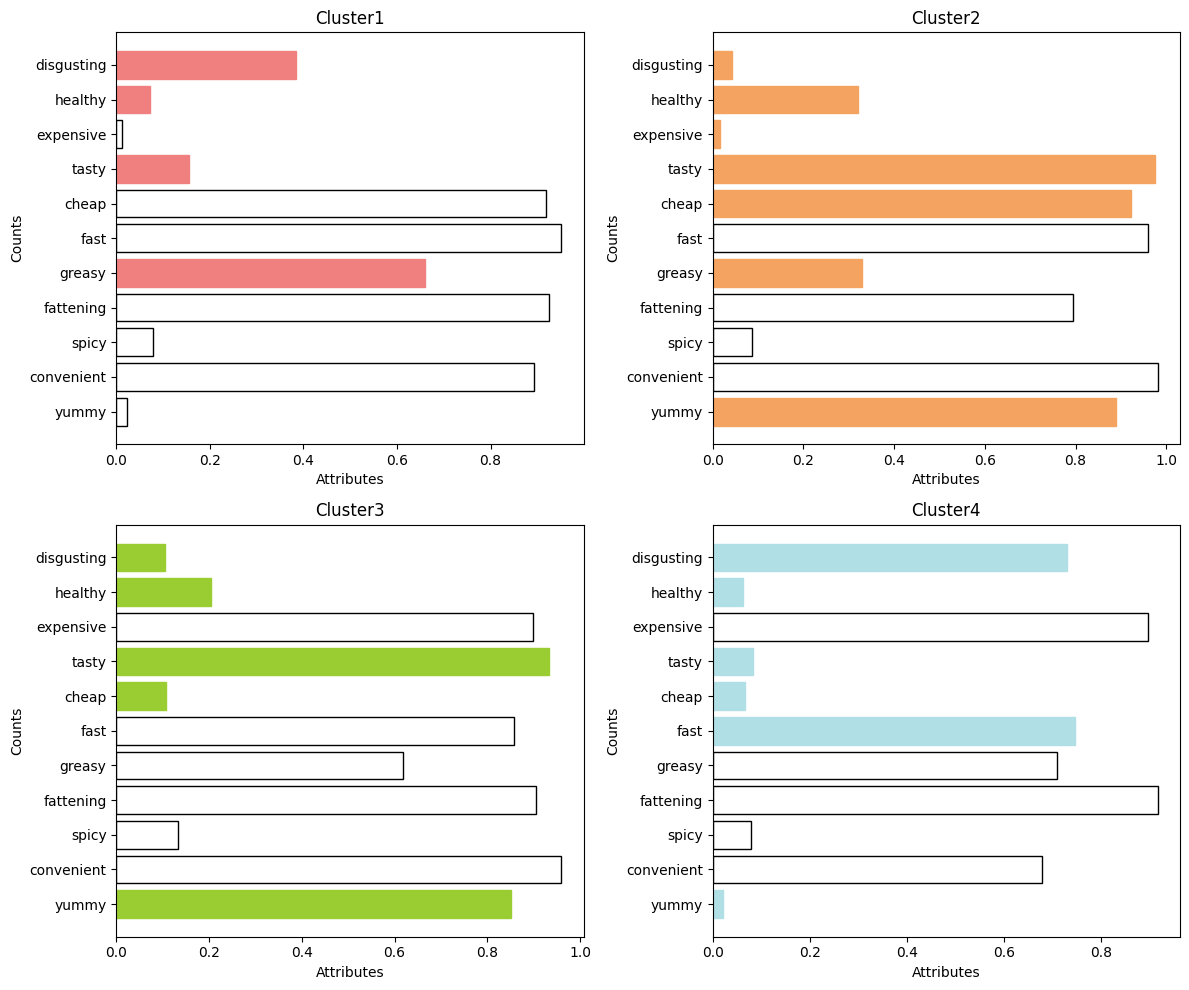

In [119]:
cluster_dict = {
    'Columns': df_taste.columns,
    'Cluster1': np.array(np.zeros(11)),
    'Cluster2': np.array(np.zeros(11)),
    'Cluster3': np.array(np.zeros(11)),
    'Cluster4': np.array(np.zeros(11))
}


segment_counts = df_copy["segments"].value_counts().sort_index()
for i, value in enumerate(segment_counts):
    temp = df_copy[df_copy['segments'] == i].drop(columns="segments")
    temp = temp.sum()/value
    cluster_dict["Cluster{}".format(i+1)] = temp.values

profile_plot_data= pd.DataFrame(cluster_dict)

cluster_list = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.figure(figsize=(12, 10))
for idx, cluster in enumerate(cluster_list,1):
    if idx==1: 
        k_range = [7, 4, 9,10]
        color="lightcoral"
    elif idx==2:
        k_range = [0,4,6,7,8,9,10]
        color="sandybrown"
    elif idx==3:
        k_range = [0,6,7,9,10]
        color="yellowgreen"
    else:
        k_range = [0, 5,6,7,9,10]
        color="powderblue"
    plt.subplot(2, 2, idx)
    bars = plt.barh(profile_plot_data['Columns'], profile_plot_data[cluster],edgecolor='black',facecolor='none')
    for i in k_range:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(cluster)
    

plt.tight_layout()

plt.show()

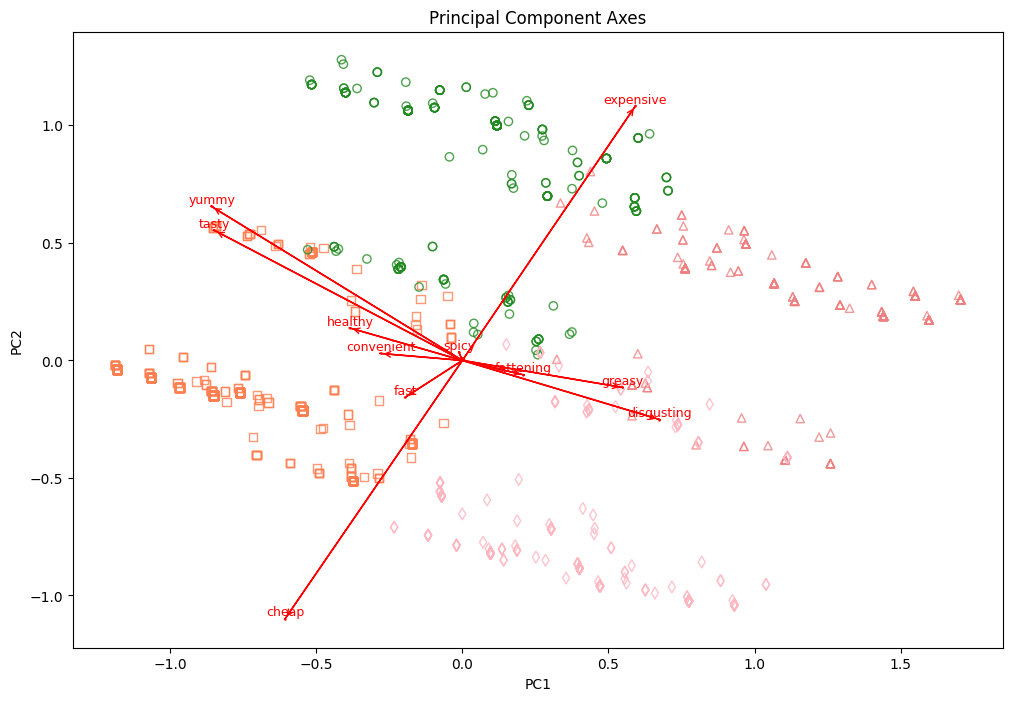

In [120]:
k4 = KMeans(n_clusters=4)
k4.fit(df_PCA)
l4 = k4.predict(df_PCA)

texts = []

markers = ['^', 's', 'o', 'd']

edge_colors = ['lightcoral', 'coral', 'forestgreen', 'lightpink']

height = []
plt.figure(figsize=(12,8))
for i in range(4):
    temp = df_PCA[['yummy', 'convenient']][l4 == i]
    plt.scatter(temp['yummy'], temp['convenient'],label=i,edgecolor=edge_colors[i],marker=markers[i],alpha = 0.8,facecolor='none')

scale = 1.8

for i,j in enumerate(df_PCA.columns):
    text = plt.text(pca.components_[0, :][i]*scale,(pca.components_[1, :][i])*scale,j,color='red',fontsize=9,ha='center',va='bottom',stretch="expanded")
    texts.append(text)
    plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate('',xytext=(0, 0), xy=(pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale), arrowprops=dict(arrowstyle="->", color='red'))

plt.scatter(pca.components_[0, :]*scale, pca.components_[1, :]*scale,s = 0.5,color='red')

plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

## Step 7: Describing Segments

In [121]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


<Figure size 1200x800 with 0 Axes>

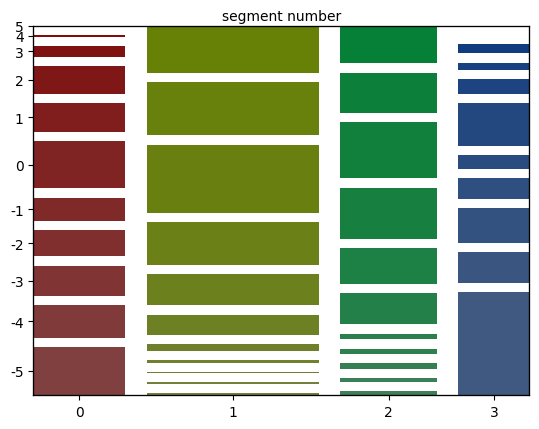

In [122]:
temp_col = df['Like'].replace({
    '+1':1,
    '+2':2,
    '+3':3,
    '+4':4,
    'I love it!+5':5,
    '0': 0,
    '-1': -1,
    '-2':-2,
    '-3':-3,
    '-4':-4,
    'I hate it!-5':-5
})

frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['like'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k: '')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

<Figure size 1200x800 with 0 Axes>

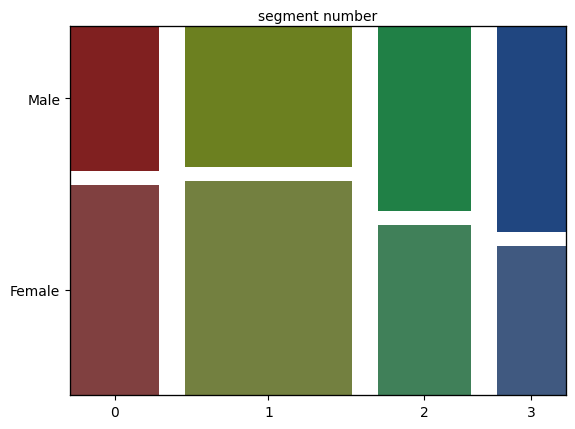

In [123]:
frame = pd.DataFrame({
    'segment': label4,
    'gender': df['Gender']
})

cross_tab = pd.crosstab(frame['segment'], frame['gender'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.06,labelizer = lambda k:'')

plt.xlabel('segment number')
plt.ylabel('Count')

plt.show()

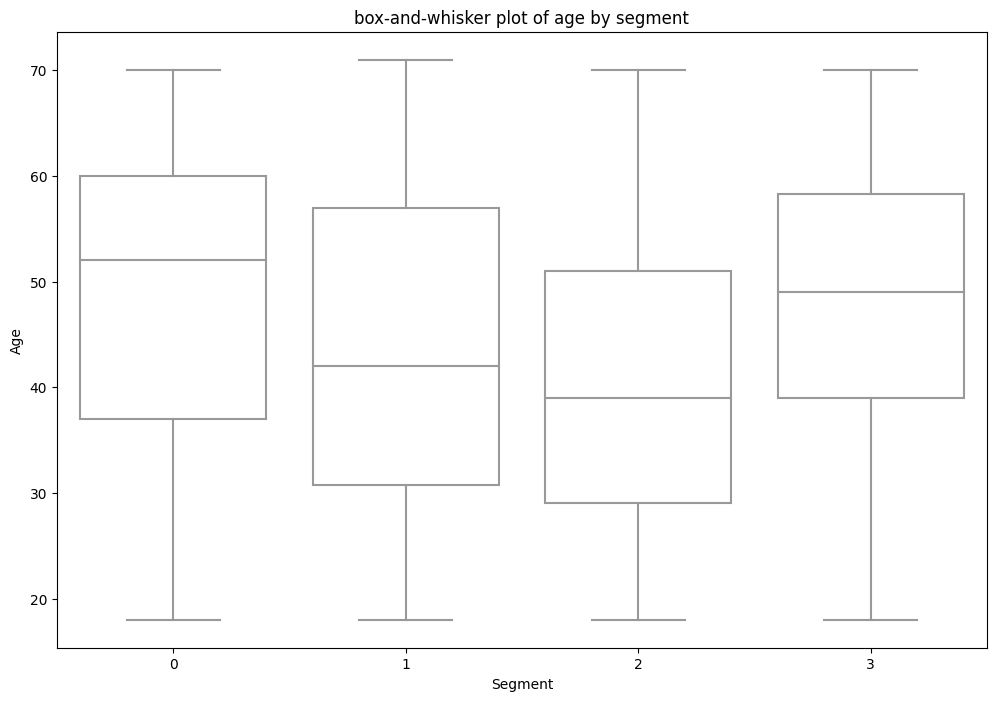

In [124]:
frame = pd.DataFrame({
    'segment': label4,
    'Age': df['Age']
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='segment', y='Age', data=frame,color='white')

plt.xlabel('Segment')
plt.ylabel('Age')
plt.title('box-and-whisker plot of age by segment')

plt.show()

## Step 8: Target Segment Selection

In [125]:
frame = pd.DataFrame({
    'segment': label4,
    'like': temp_col,
    'VisitFrequency': df['VisitFrequency'],
    'Gender': df['Gender']
})


visit_freq = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'More than once a week': 5,
    'Once a week': 6
}


frame['VisitFrequencyNumeric'] = frame['VisitFrequency'].map(visit_freq)
frame["GenderNumeric"] = np.where(df['Gender']=='Male',1,0)

visit = frame.groupby('segment')['VisitFrequencyNumeric'].mean()
like = frame.groupby('segment')['like'].mean()
female = frame.groupby('segment')["GenderNumeric"].mean()


In [126]:
visit

segment
0    2.676375
1    4.122414
2    3.984568
3    2.450000
Name: VisitFrequencyNumeric, dtype: float64

In [127]:
like

segment
0   -1.495146
1    2.665517
2    2.120370
3   -2.675000
Name: like, dtype: float64

In [128]:
female

segment
0    0.407767
1    0.398276
2    0.521605
3    0.579167
Name: GenderNumeric, dtype: float64

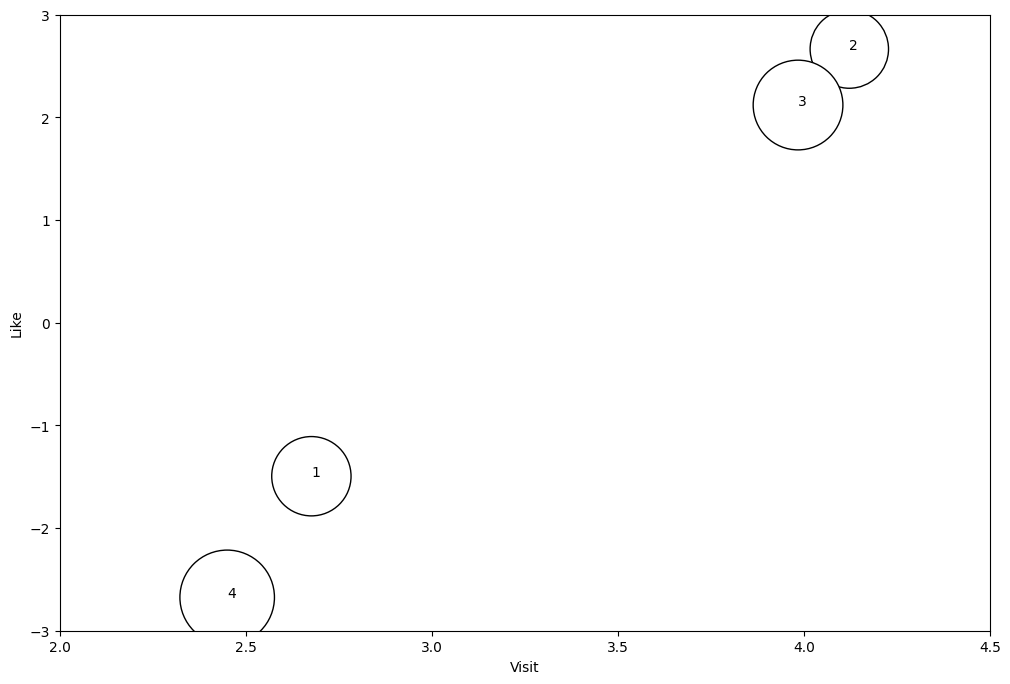

In [129]:
plt.figure(figsize=(12, 8))
plt.scatter(visit, like, s=female*8000,color='white',edgecolor="black")

for i, segment in enumerate(visit.index):
    plt.text(visit[segment], like[segment], str(i+1))

plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.xlabel('Visit')
plt.ylabel('Like')

plt.show()

# ThankYou!!